<a href="https://colab.research.google.com/github/rishrk007/Stock-Closing-Prediction-Apple/blob/main/Stock_Closing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
key = "Get your API Key from Tiingo by Login/SignUP "

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('aapl.csv')

In [10]:
df = pd.read_csv("aapl.csv")

In [11]:
df.head(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-01-29 00:00:00+00:00,97.34,97.34,94.35,94.79,64416504,22.542833,22.542833,21.850383,21.952282,257666016,0.00,1.0
1,AAPL,2016-02-01 00:00:00+00:00,96.43,96.71,95.40,96.47,40943541,22.332087,22.396932,22.093551,22.341350,163774164,0.00,1.0
2,AAPL,2016-02-02 00:00:00+00:00,94.48,96.04,94.28,95.42,37357215,21.880489,22.241767,21.834171,22.098182,149428860,0.00,1.0
3,AAPL,2016-02-03 00:00:00+00:00,96.35,96.84,94.08,95.00,45964294,22.313560,22.427038,21.787854,22.000915,183857176,0.00,1.0
4,AAPL,2016-02-04 00:00:00+00:00,96.60,97.33,95.19,95.86,46471652,22.491883,22.661853,22.163585,22.319585,185886608,0.52,1.0


In [12]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-01-20 00:00:00+00:00,132.03,132.49,128.55,128.66,104319489,132.03,132.49,128.55,128.66,104319489,0.0,1.0
1253,AAPL,2021-01-21 00:00:00+00:00,136.87,139.67,133.59,133.80,120529544,136.87,139.67,133.59,133.80,120529544,0.0,1.0
1254,AAPL,2021-01-22 00:00:00+00:00,139.07,139.85,135.02,136.28,114459360,139.07,139.85,135.02,136.28,114459360,0.0,1.0
1255,AAPL,2021-01-25 00:00:00+00:00,142.92,145.09,136.54,143.07,157611713,142.92,145.09,136.54,143.07,157611713,0.0,1.0
1256,AAPL,2021-01-26 00:00:00+00:00,143.16,144.30,141.37,143.60,98390555,143.16,144.30,141.37,143.60,98390555,0.0,1.0


In [17]:
df1 = df.reset_index()['close']
df1.shape

(1257,)

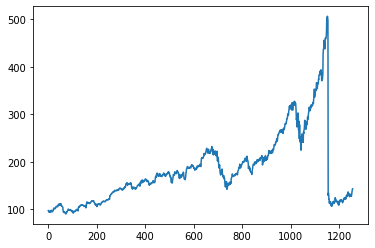

In [18]:
plt.plot(df1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
df1.shape

(1257, 1)

In [23]:
# Splitting Data for Training and Testing
training_size = int(len(df1)*0.65)
testing_size = len(df1)-training_size

train , test = df1[0:training_size,:] , df1[training_size:len(df1),:]

In [24]:
print(train.shape , test.shape)

(817, 1) (440, 1)


In [34]:
# Creating array of values into dataset matrix
def create_dataset(dataset,time_step=1):
  dataX , dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    data = dataset[i:(time_step+i),0]
    dataX.append(data)
    dataY.append(dataset[time_step+i,0])
  return (np.array(dataX),np.array(dataY))

In [35]:
time_step = 100
x_train , y_train = create_dataset(train,time_step)
x_test , y_test = create_dataset(test,time_step)


In [38]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(716, 100) (716,)
(339, 100) (339,)


In [40]:
# For Lstm 3-D data is required
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [44]:
# Lstm Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 297ms/step - loss: 0.0186 - val_loss: 0.0417
Epoch 2/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0025 - val_loss: 0.0202
Epoch 3/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0012 - val_loss: 0.0189
Epoch 4/100
12/12 [==============================] - 2s 194ms/step - loss: 4.6063e-04 - val_loss: 0.0192
Epoch 5/100
12/12 [==============================] - 2s 209ms/step - loss: 3.8378e-04 - val_loss: 0.0178
Epoch 6/100
12/12 [==============================] - 2s 206ms/step - loss: 3.0751e-04 - val_loss: 0.0174
Epoch 7/100
12/12 [==============================] - 2s 200ms/step - loss: 2.8459e-04 - val_loss: 0.0170
Epoch 8/100
12/12 [==============================] - 2s 194ms/step - loss: 3.0901e-04 - val_loss: 0.0165
Epoch 9/100
12/12 [==============================] - 2s 196ms/step - loss: 2.9430e-04 - val_loss: 0.0159
Epoch 10/100
12/12 [==============================] - 2s 194ms/step

In [47]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [48]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [53]:
from sklearn.metrics import mean_squared_error as mse
print("Training Error\n")
print(np.sqrt(mse(y_train,train_predict)))

Training Error

165.37297432656868


In [54]:
print("Testing Error\n")
print(np.sqrt(mse(y_test,test_predict)))

Testing Error

256.35565691462284


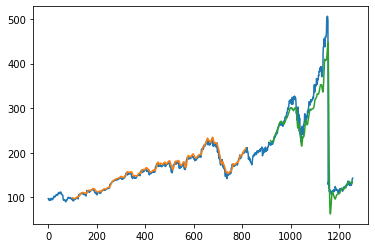

In [60]:
### Plot
# Shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

**Next 30 Days Prediction**

In [61]:
len(test)

440

In [104]:
x_input = test[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [105]:
temp_input = x_input[0].tolist()

In [ ]:
temp_input

In [107]:
n_steps = 100
output = []
i = 0
while(i<30):
  if (len(temp_input) > 100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    output.extend(yhat.tolist())
    i = i+1

  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    output.extend(yhat.tolist())
    i = i+1



[0.11651773]
1 day input [0.07345761 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862
 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046
 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568
 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871
 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107
 0.05943476 0.06316296 0.05017438 0.06008419 0.044546   0.04432952
 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762
 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253
 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891
 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079
 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465
 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295
 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474
 0.09782321 0.08721587 0.09760673 0.10

In [111]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [110]:
 df3 = df1.tolist()
 df3.extend(output)

In [112]:
len(df1)

1257

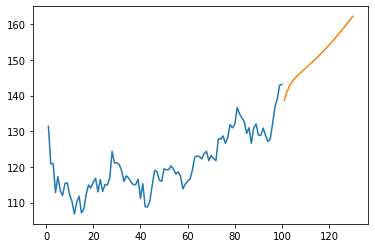

In [113]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(output))

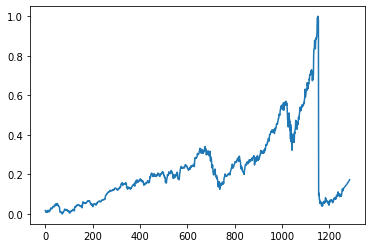

In [114]:
plt.plot(df3)